In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
xls = pd.ExcelFile("AU employment.xlsx")
livestock = pd.read_excel(xls)
print(livestock)

    Year  Agriculture 000
0   1973              377
1   1974              368
2   1975              365
3   1976              360
4   1977              351
5   1978              348
6   1979              364
7   1980              367
8   1981              363
9   1982              374
10  1983              367
11  1984              361
12  1985              386
13  1986              377
14  1987              375
15  1988              384
16  1989              381
17  1990              387
18  1991              352
19  1992              344
20  1993              350
21  1994              345
22  1995              351
23  1996              359
24  1997              364
25  1998              360
26  1999              379
27  2000              368
28  2001              378
29  2002              333
30  2003              320
31  2004              308
32  2005              301
33  2006              299
34  2007              292
35  2008              310
36  2009              304
37  2010    

In [2]:
#int to datetime
livestock['Year'] = pd.to_datetime(livestock['Year'], format='%Y')

In [3]:
from datetime import datetime
con=livestock['Year']
livestock['Year']=pd.to_datetime(livestock['Year'])
livestock.set_index('Year', inplace=True)
#check datatype of index
livestock.index

DatetimeIndex(['1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [4]:
#convert to time series:
ts = livestock['Agriculture 000']
ts.head(10)

Year
1973-01-01    377
1974-01-01    368
1975-01-01    365
1976-01-01    360
1977-01-01    351
1978-01-01    348
1979-01-01    364
1980-01-01    367
1981-01-01    363
1982-01-01    374
Name: Agriculture 000, dtype: int64

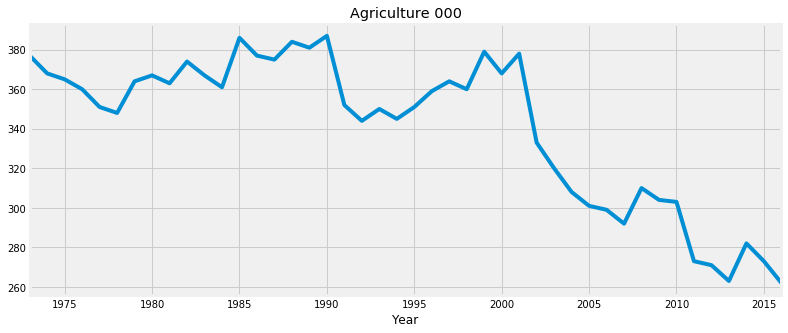

In [5]:
#plot the data set to see how it look
ts.plot(figsize=(12,5))
plt.title('Agriculture 000')
plt.show()

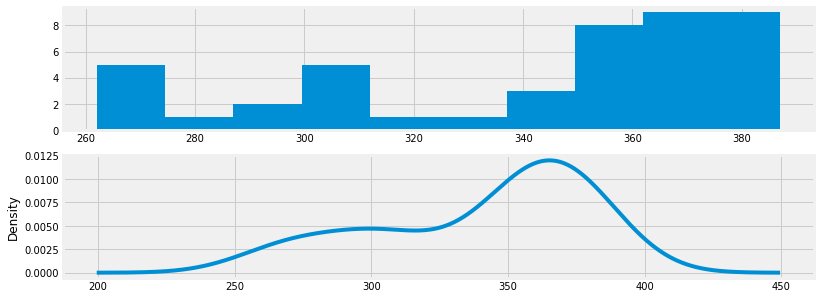

In [6]:
#to see the data distubition
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,5))
ts.hist(ax=ax1)
ts.plot(kind='kde', ax=ax2)
plt.show();

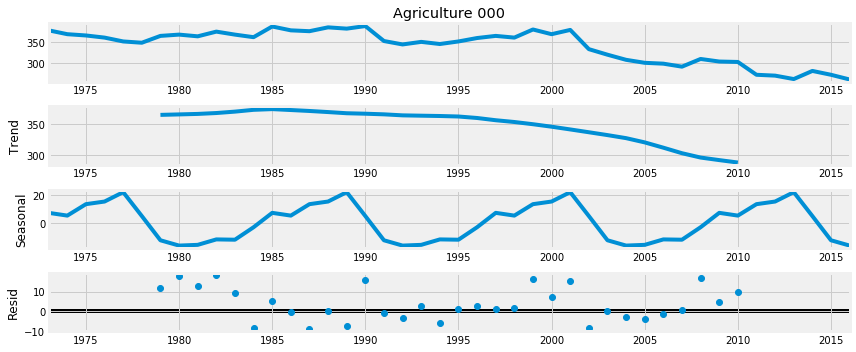

In [7]:
# do the time series decomposition
decomposition = seasonal_decompose(ts, freq=12, model='additive')
plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show();

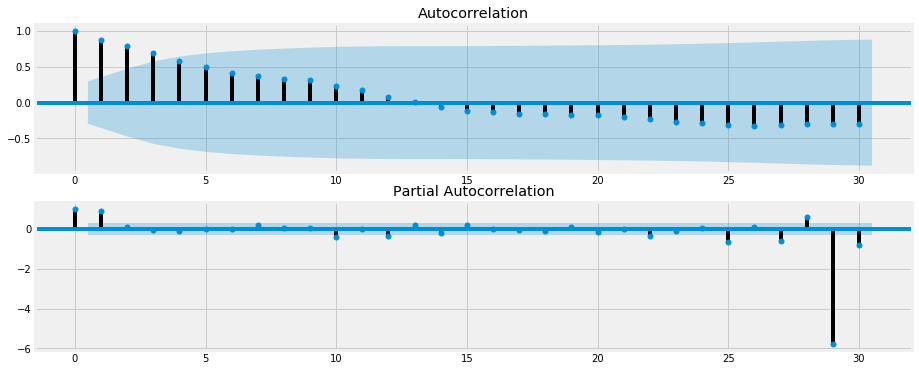

In [8]:
#do ACF and PACF plots to check the staionary
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(ts, lags=30, ax=ax1)
ax2 = plot_pacf(ts, lags=30, ax=ax2)
plt.show()

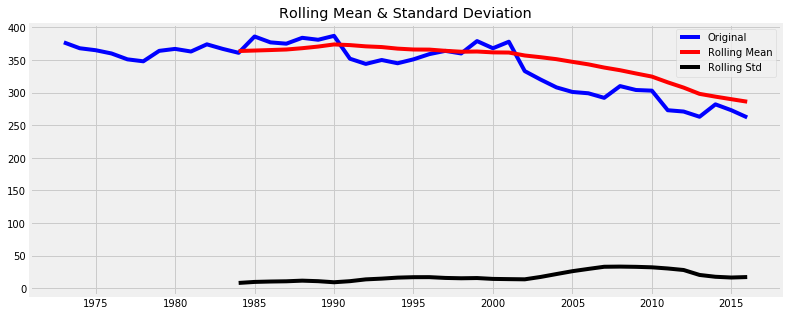

In [9]:
#Determing rolling statistics
rolmean = pd.Series(ts).rolling(window=12).mean()
rolstd = pd.Series(ts).rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
# use Augmented Dickey Fuller Test to check the stationary
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.399514
p-value                         0.910180
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


# Try to make time series Stationary

In [11]:
df_diff = ts.diff().diff(12)

In [12]:
df_diff.dropna(inplace=True)

In [13]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.316552e+00
p-value                        1.225005e-10
#Lags Used                     0.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64


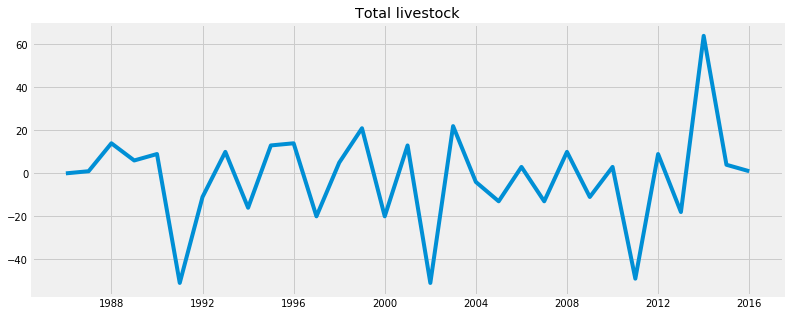

In [14]:
plt.plot(df_diff)
plt.title('Total livestock')
plt.savefig('diffplot')
plt.show()

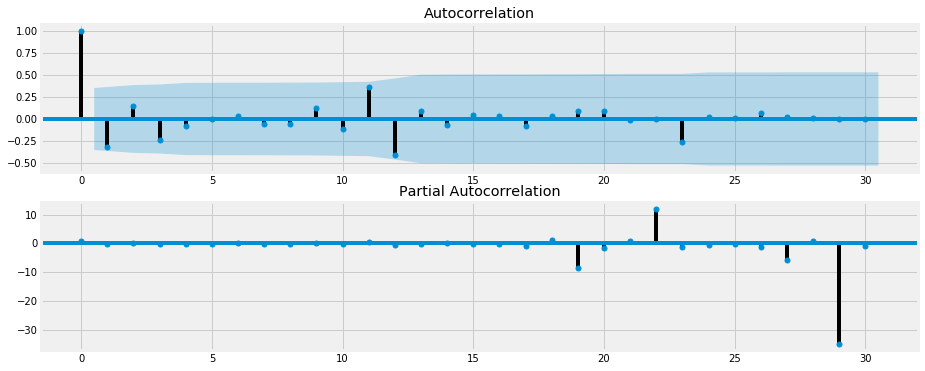

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=30, ax=ax1)
ax2 = plot_pacf(df_diff, lags=30, ax=ax2)
plt.savefig('acfpacf2')
plt.show()

In [16]:
#do the Model Parameter Estimation
import pmdarima as pm
model = pm.auto_arima(ts, d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=285.008, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=278.172, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=283.905, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=1.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=272.753, Time=2.33 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=274.752, Time=3.41 sec


C:\Users\s0652\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=4.47 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=272.209, Time=2.29 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=276.827, Time=0.45 sec


C:\Users\s0652\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=3.73 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=272.718, Time=2.27 sec


C:\Users\s0652\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=4.65 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=272.209, Time=1.74 sec

Best model:  ARIMA(0,1,0)(2,1,1)[12] intercept
Total fit time: 37.053 seconds


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   44
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -131.105
Date:                              Thu, 10 Sep 2020   AIC                            272.209
Time:                                      23:07:12   BIC                            279.379
Sample:                                           0   HQIC                           274.546
                                               - 44                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.6309   4446.636     -0.001      0.999   -8719.878    8710.616
ar.S.L12      -1.1383   1560.250     -0.001      0.999   -3059.172    3056.896
ar.S.L24      -0.6724   1138.298     -0.001      1.000   -2231.696    2230.351
ma.S.L12      -0.6230   1.06e+04  -5.87e-05      1.000   -2.08e+04    2.08e+04
sigma2        72.8294   5.91e+05      0.000      1.000   -1.16e+06    1.16e+06
===================================================================================
Ljung-Box (Q):                       21.87   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.86   Prob(JB):                         0.50
Heteroskedasticity (H):               1.82   Skew:                            -0.52
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

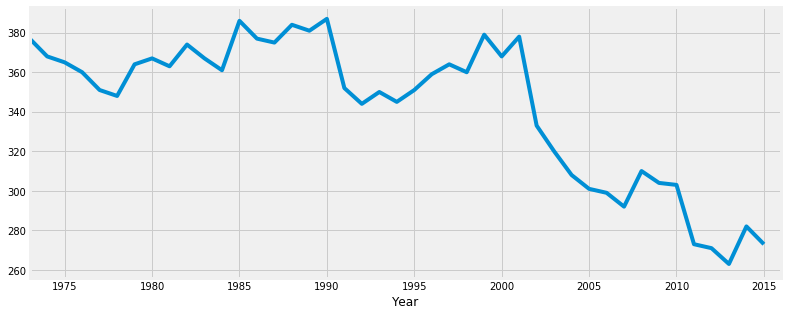

In [18]:
#divide into train and validation set
train = ts[:int(0.99*(len(ts)))]
test = ts[int(0.99*(len(ts))):]

#plotting the data
train.plot()
test.plot()

In [19]:
model = SARIMAX(train,order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

C:\Users\s0652\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\s0652\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      Agriculture 000   No. Observations:                   43
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -130.130
Date:                              Thu, 10 Sep 2020   AIC                            266.261
Time:                                      23:07:13   BIC                            270.465
Sample:                                  01-01-1973   HQIC                           267.606
                                       - 01-01-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2122      0.243     -0.873      0.383      -0.689       0.264
ma.S.L12      -0.9991    255.944     -0.004      0.997    -502.641     500.642
sigma2       208.4324   5.34e+04      0.004      0.997   -1.04e+05    1.05e+05
===================================================================================
Ljung-Box (Q):                       25.71   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.64   Prob(JB):                         0.57
Heteroskedasticity (H):               1.19   Skew:                            -0.46
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

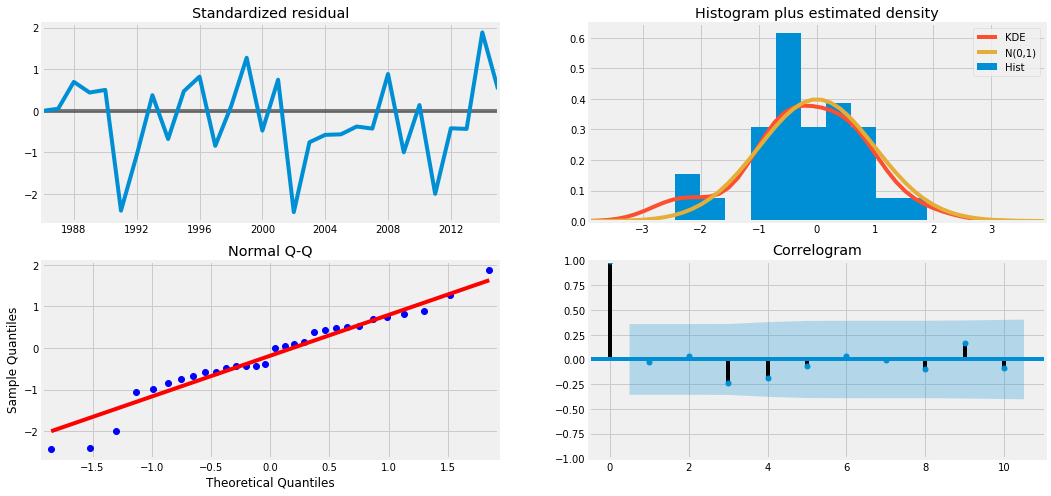

In [20]:
#Model Diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

In [21]:
forecast_object = results.get_forecast(steps=len(test))

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

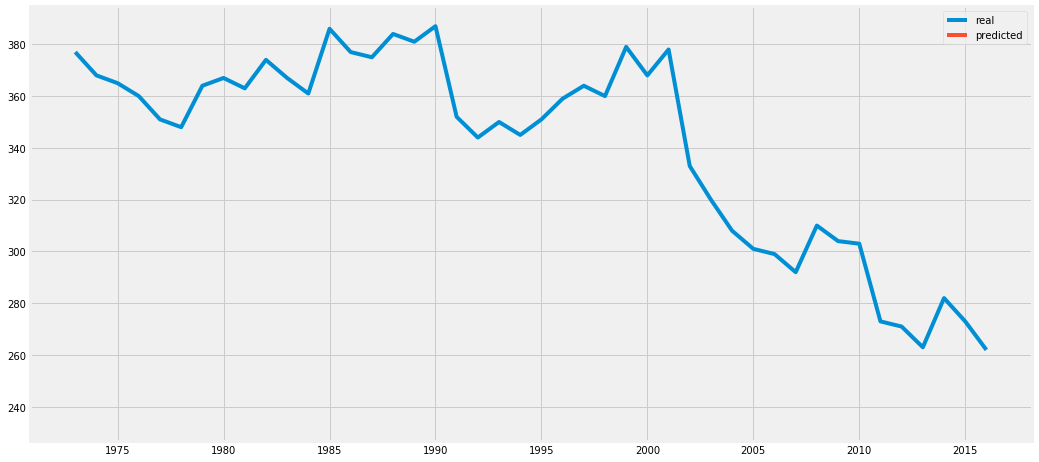

In [22]:
plt.figure(figsize=(16,8))

# Plot past CO2 levels
plt.plot(ts.index, ts, label='real')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [23]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(0,1,1,12) Predictions')

In [24]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={ts[i]}")

predicted=266.9799308, expected=377


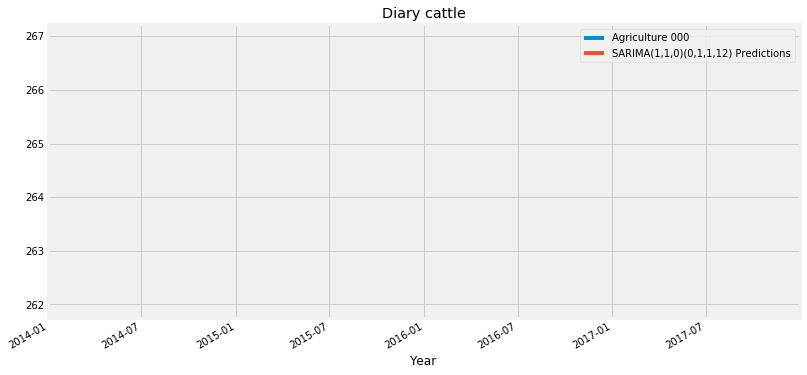

In [25]:
# Plot predictions against known values
title = 'Diary cattle'
ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);

In [26]:
r2_score(test, predictions)

nan

In [27]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(test, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test)/np.abs(test))*100 

evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,NaN,4.979931,24.79971,1.900737


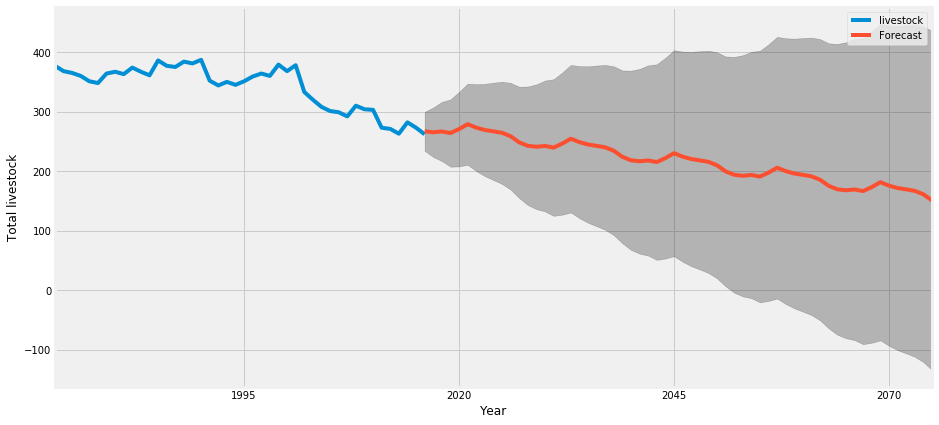

In [28]:
#do the predition
pred_f = results.get_forecast(steps=60)
pred_ci = pred_f.conf_int()
ax = ts.plot(label='livestock', figsize=(14, 7))
pred_f.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Total livestock')
plt.legend()
plt.show()

In [29]:
pred2 = []
pred2 = results.get_forecast(steps=60)
pred2 = pred2.predicted_mean
print(pred2)

2016-01-01    266.979931
2017-01-01    265.388890
2018-01-01    266.703696
2019-01-01    264.052190
2020-01-01    270.663576
2021-01-01    278.918589
2022-01-01    273.168933
2023-01-01    269.169031
2024-01-01    266.919102
2025-01-01    264.419176
2026-01-01    258.669364
2027-01-01    248.419812
2028-01-01    242.664892
2029-01-01    241.017588
2030-01-01    242.344333
2031-01-01    239.690294
2032-01-01    246.302217
2033-01-01    254.557116
2034-01-01    248.807484
2035-01-01    244.807577
2036-01-01    242.557649
2037-01-01    240.057722
2038-01-01    234.307911
2039-01-01    224.058359
2040-01-01    218.303439
2041-01-01    216.656135
2042-01-01    217.982880
2043-01-01    215.328840
2044-01-01    221.940764
2045-01-01    230.195663
2046-01-01    224.446030
2047-01-01    220.446123
2048-01-01    218.196195
2049-01-01    215.696269
2050-01-01    209.946457
2051-01-01    199.696906
2052-01-01    193.941985
2053-01-01    192.294681
2054-01-01    193.621426
2055-01-01    190.967387


In [30]:
pred3 = round(pred2, 2)
pred3

2016-01-01    266.98
2017-01-01    265.39
2018-01-01    266.70
2019-01-01    264.05
2020-01-01    270.66
2021-01-01    278.92
2022-01-01    273.17
2023-01-01    269.17
2024-01-01    266.92
2025-01-01    264.42
2026-01-01    258.67
2027-01-01    248.42
2028-01-01    242.66
2029-01-01    241.02
2030-01-01    242.34
2031-01-01    239.69
2032-01-01    246.30
2033-01-01    254.56
2034-01-01    248.81
2035-01-01    244.81
2036-01-01    242.56
2037-01-01    240.06
2038-01-01    234.31
2039-01-01    224.06
2040-01-01    218.30
2041-01-01    216.66
2042-01-01    217.98
2043-01-01    215.33
2044-01-01    221.94
2045-01-01    230.20
2046-01-01    224.45
2047-01-01    220.45
2048-01-01    218.20
2049-01-01    215.70
2050-01-01    209.95
2051-01-01    199.70
2052-01-01    193.94
2053-01-01    192.29
2054-01-01    193.62
2055-01-01    190.97
2056-01-01    197.58
2057-01-01    205.83
2058-01-01    200.08
2059-01-01    196.08
2060-01-01    193.83
2061-01-01    191.33
2062-01-01    185.59
2063-01-01   

In [31]:
pred3.to_csv (r'agriculture_v2.csv', index = False, header=True)